In [3]:
#display full screen width
from IPython.core.display import display, HTML, clear_output

display(HTML("<style>.container { width:100% !important; }</style>"))

#import and set visualisation paramenters
import pandas as pd
import functions as f
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#from __future__ import print_function
import ipywidgets as widgets
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# **Monty Hall: extension and visualisation**

In this notebook I am going to:    

1. present the [Monty Hall game](#MHP) and briefly show the solution  


2. present the [functions](#functions) used to simulate the game


3. generalise the [game](#generalisationI) with:  
 - $n$ total doors
 - $o$ doors opened by the host
 - $w$ winning doors   
 
 briefly discuss the solution and visualise how the results change by varying the parameters of the game. 
      
      
3. generalise the [game](#generalisationII) to allow player to:    
 - play $p$ doors
 - switch $s$ doors
 
 and provide a function to simulate the generalised game.   
 
 
 
4. Provide an [interactive tool](#ToolVisualise) to visualise how the win proabilites of the switching and non-switching strategies change as parameters of the game change.

            
<br>
<br>
Appendix

 - [Joint Probabilities](#AI_JP)
 - [Bayes Theorem](#AI_BT)
 - [Solution for the Monty Hall game](#SMH)
 - [Solution for the generalised game](#SGG)

<a id='MHP'></a>
## Monty Hall 

### The game

<table>
    <col width="25%">
    <col width="25%">
    <col width="25%">
    <col width="25%">
<style>
table, th, td {
  border: 1px solid black;
}
</style>
 <tr>
         <td><b style="font-size:12px"><center>1. set-up<center></b></td>
    <td><b style="font-size:12px"><center>2. initial choice<center></b></td>
         <td><b style="font-size:12px"><center>3.losing door revealed<center></b></td>
    <td><b style="font-size:12px"><center>4. switch or stay?<center></b></td>

 </tr>
<tr>
<td>

A contestant faces three closed doors. Behind one of them is a car and behind each of the other two is a goat.

1)&nbsp;🚗🚪&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp;&nbsp;💭     
2)&nbsp;🐐🚪&nbsp; &nbsp; &nbsp; &nbsp;  🤔     
3)&nbsp;🐐🚪       

</td>
<td>

The contestant wins the car if he guesses behind which door the car is.   
<br>    

1)&nbsp;🚗🚪&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp;&nbsp;💭     
2)&nbsp;🐐🚪 ⬅ &nbsp;   🤔     
3)&nbsp;🐐🚪       

</td>
<td>

After the initial choice, the host opens one of the two doors with a goat.     
<br>
    
1)&nbsp;🚗🚪&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp;&nbsp;💭     
2)&nbsp;🐐🚪&nbsp; &nbsp; &nbsp; &nbsp;  🤔     
3)&nbsp;🐐❌       

</td>
<td>

At this point, the contestant has two possibilities:


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*SWITCH*&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*STAY*       
1)&nbsp;🚗🚪⬅ &nbsp; &nbsp; &nbsp; 💭&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1)&nbsp;🚗🚪&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp;&nbsp;💭        
2)&nbsp;🐐🚪&nbsp; &nbsp; &nbsp; &nbsp; 🤔&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2)&nbsp;🐐🚪 ⬅ &nbsp;   🤔     
3)&nbsp;🐐❌&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3)&nbsp;🐐❌      
</td>
</tr>
</table>
             
             
### Solution 

By randomly selecting a door, the contestant has $\frac{1}{3}$ probability of winning.    
If he/she switches, the contestant increases the chances of winning to $\frac{2}{3}$. if not, the chances to win remain $\frac{1}{3}$. 

This happens because the host is not free to chose which door to open, since he/she knows where the car is and will never open the winning door.

As shown in [Appendix II](#AII), the probability of the car being behind door $i$, given that the constestant has played door $y$ and the host has opened door $o$ - $P(C_i|P_y, O_z)$ - depends on the probability of the host opening door $o$, given that the car is behind door $i$ and the player has played door $p$ - $P(O_z|C_i, P_y)$.

$P(O_z|C_i, P_y)$ varies depening on whether the contestant has chosen the winning door or not. Since the host will never reveal a winning door, the probability that the host will open a certain door equals $1$ if the contestant has initially chosen a door with a goat and equals $1/2$ if the contestant has initially chosen the door with the car.

From the formula below, we see that if the contestant chooses a door $i$ different from his/her initial choice $y$, the chance of winning doubles.

$
\begin{equation}
  P(C_i|P_y, O_z)  = \frac{P(O_z|C_i, P_y) \times P(C_i, P_y)}{P(P_y, O_z)} = 
    \begin{cases}
      \frac{1}{3} & \text{if $i=y$} \\
      \frac{2}{3} & \text{if $i \neq y$}\\
    \end{cases}       
\end{equation}
$

<a id='functions'></a>
## Functions to simulate the game and visualise the results


The functions are stores in the file _functions.py,_ imported here as _f._        
- _compute_monty_hall()_ computes the win rates associated with the strategies to always switch and to never switch, by using the formula for the [first generalisation of the game](#generalisationI), shown in the [Appendix](#SGC) (see below). Using the default parameters one simulates the standard game.   


- _play_monty_hall()_ simulates 10,000 trials of the the [second generalisation of the game](#generalisationII) and computes the win rates associated with the strategies to always switch and to never switch. Using the default parameters one simulates the standard game.      


- _print_line_chart_monty_hall()_ simply plots the results.

In [4]:
#print simulation
f.simulate_monty_hall() 

,switch,no_switch,total doors,winning doors,doors opened,doors chosen,doors switched
0,66.77%,33.23%,3,1,1,1,1


In [5]:
#print formula
f.compute_monty_hall()

,switch,no_switch,total doors,winning doors,doors opened
0,66.67%,33.33%,3,1,1


<a id='generalisationI'></a>
## Generalisation I: $n$ total doors, $w$ winning doors, $o$ doors opened by the host

What would happen if we had more than one winning door and/or more than two losing doors? How would the switching strategy improve the winning rate if the host reavealed more than one door? 

As shown in [Appendix III](#AIII), the probability of winning in this general case equals:

 - $P(C_i|P_y, O_\Omega) = \frac{w}{n} \times \frac{n-1}{n-o-1}$, if the contestant switches door
 
 
 - $P(C_i|P_y, O_\Omega) = \frac{w}{n}$, if the constestant sticks to the initial choice


By switching, the probability of winning increases by:

$\frac{n-1}{n-o-1}$.

As $n$ increases, the advantage of the strategy to switch decreases.    
As $o$ increases, the advantage of the strategy to switch increases.    
As $w$ increases, however, the overall probability of winning the game increases, but the number of winning doors does not influence the advantage the switch strategy has over the non-switch strategy. The probability of winning by switching will always be a constant proportion of the probability of winning by non switching. This proportion is determined by $n$ and $o$: $\frac{n-1}{n-o-1}$.

To show these effect I will use the function _compute_monty_hall()_. The function takes arguments: _n_, _o_ and _w_ and computes the probabilities analitically with the formulae above.

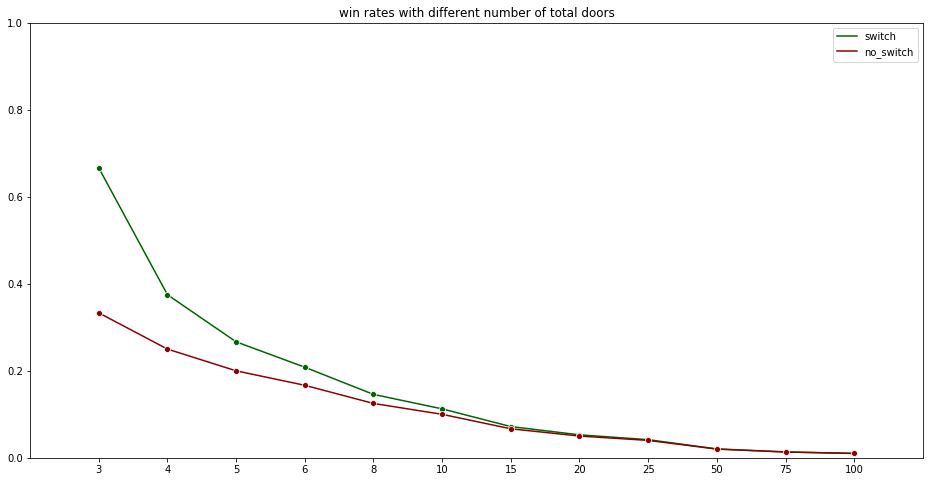

In [7]:
#increasing number of total doors
n = [3, 4, 5, 6, 8, 10, 15, 20, 25, 50, 75, 100]
win_rates = f.compute_monty_hall(n = n)
f.print_line_chart_monty_hall(win_rates = win_rates, rng = n, varying_param = 'total doors')

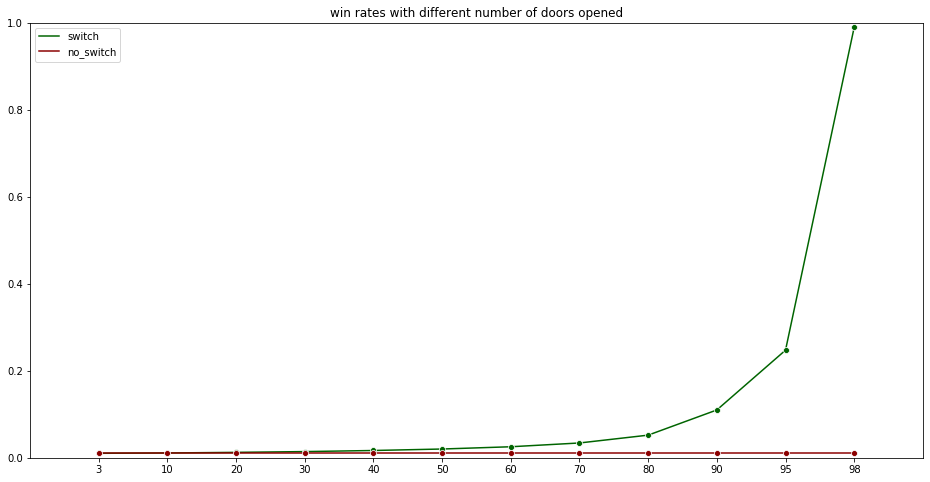

In [8]:
#increasing number of doors opened by the host (total of 50 doors with 1 winning door)
o = [3, 10, 20, 30, 40, 50, 60, 70, 80, 90, 95, 98]
win_rates = f.compute_monty_hall(n = 100, o = o)
f.print_line_chart_monty_hall(win_rates = win_rates, rng = o, varying_param = 'doors opened')

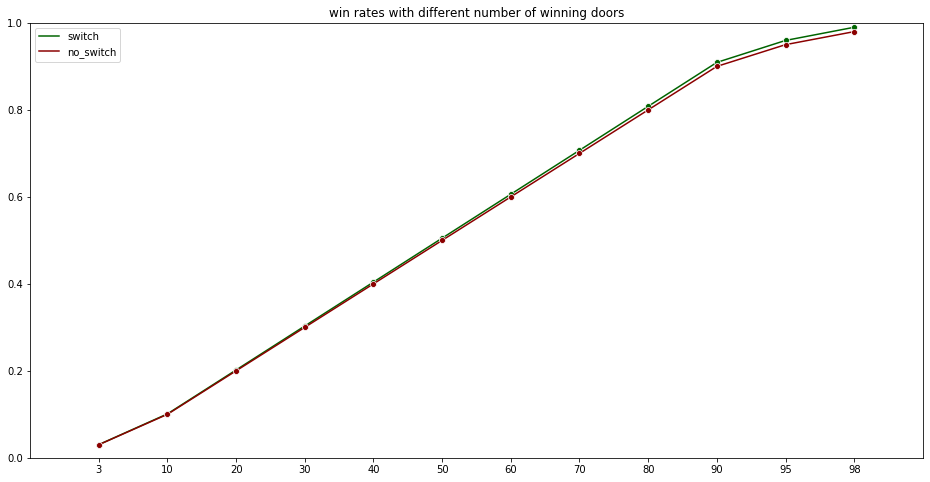

In [6]:
#increasing number of winning doors
w = [3, 10, 20, 30, 40, 50, 60, 70, 80, 90, 95, 98]
win_rates = f.compute_monty_hall(n = 100, w = w)
f.print_line_chart_monty_hall(win_rates = win_rates, rng = w, varying_param = 'winning doors')

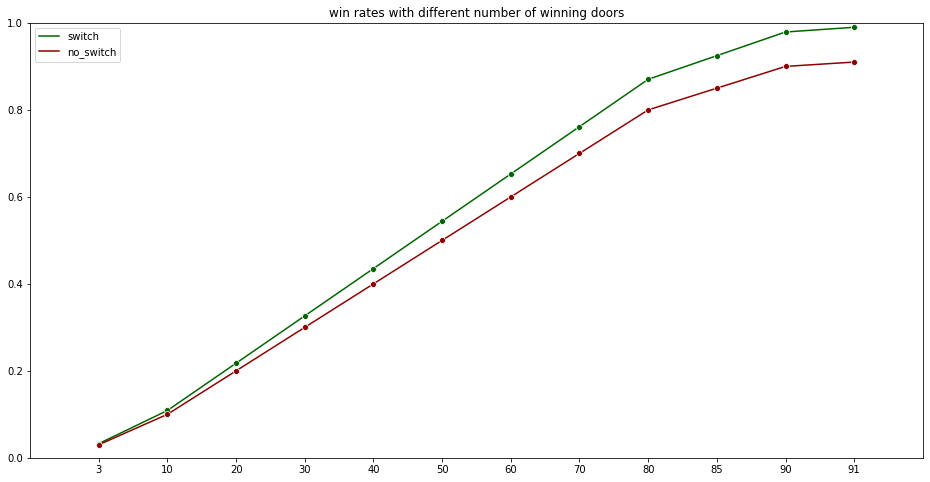

In [7]:
#increasing number of doors opened by the host. 
#o = 8, to amplify the advantage by switching
w = [3, 10, 20, 30, 40, 50, 60, 70, 80, 85, 90, 91]
win_rates = f.compute_monty_hall(n = 100, w = w, o = 8)
f.print_line_chart_monty_hall(win_rates = win_rates, rng = w, varying_param = 'winning doors')

<a id='generalisationII'></a>
## Generalisation II → Generalisation I + play $p$ doors and switch $s$ doors


The function _simulate_monty_hall(),_ simulates 10,000 plays of the game and returns the probability of winning by switching doors and by not switching. It allows the player to choose more than one door and to switch part or all of the doors initially chosen.

It takes parameters: 
- num_total_doors = [3] 
- num_winning_doors = [1]
- num_doors_to_play = [1] 
- num_doors_to_open = [1] 
- num_doors_to_switch = [1] 
- trials = [10000]

These can be integers, ranges or lists. All ranges and list must have either the same length or length 1.

From the graphs we see that the fact of initially choosing more doors does not give advantage to the switch strategy over the non-switch strategy. 
But if the contestant can choose more than one doors, than switching more than one increased his/her chances of winning.

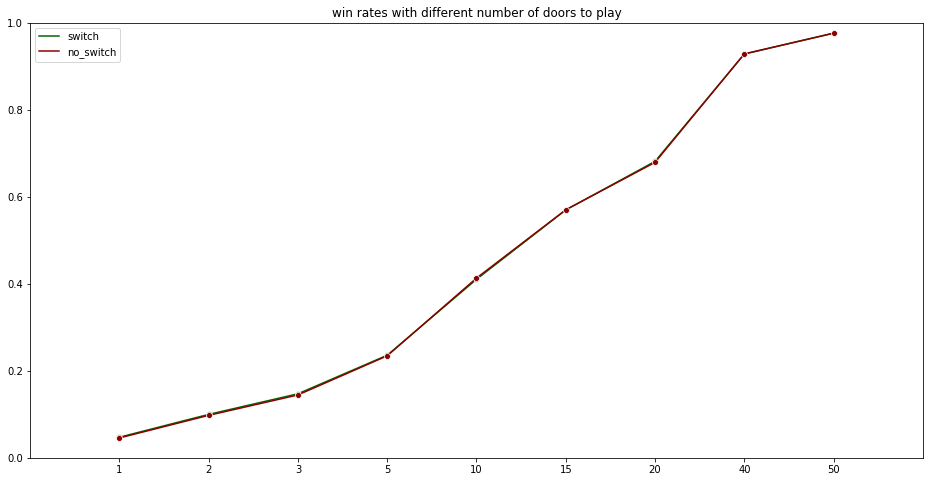

In [36]:
#increasing number of doors to play
p = [1, 2, 3, 5, 10, 15, 20, 40, 50]
win_rates_s = f.simulate_monty_hall(num_total_doors = 100, 
                        num_winning_doors = 5, 
                        num_doors_to_play = p,
                        num_doors_to_open = 1, 
                        num_doors_to_switch = 1, 
                        trials = 10000)
f.print_line_chart_monty_hall(win_rates = win_rates_s, rng = p, varying_param = 'doors to play')

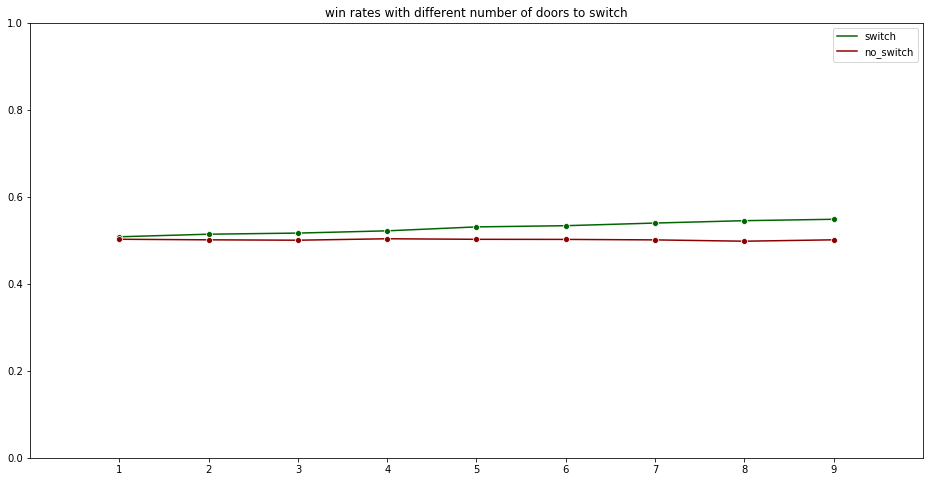

In [38]:
#increasing number of doors to switch
s = [1, 2, 3, 4, 5, 6, 7, 8, 9]
win_rates_s = f.simulate_monty_hall(num_total_doors = 20, 
                        num_winning_doors = 1, 
                        num_doors_to_play = 10,
                        num_doors_to_open = 1, 
                        num_doors_to_switch = s, 
                        trials = 50000)
f.print_line_chart_monty_hall(win_rates = win_rates_s, rng = s, varying_param = 'doors to switch')

In [9]:
#example of simulation & inputs
win_rates_s = f.simulate_monty_hall(num_total_doors = [15] * 5, 
                        num_winning_doors = [1, 2, 3, 2, 1], 
                        num_doors_to_play = range(1, 6),
                        num_doors_to_open = 4, 
                        num_doors_to_switch = [1], 
                        trials = 10000)

,switch,no_switch,total doors,winning doors,doors opened,doors chosen,doors switched
0,8.00%,7.40%,15,1,4,1,1
1,29.70%,25.00%,15,2,4,2,1
2,60.40%,49.50%,15,3,4,3,1
3,51.70%,47.30%,15,2,4,4,1
4,38.40%,31.60%,15,1,4,5,1


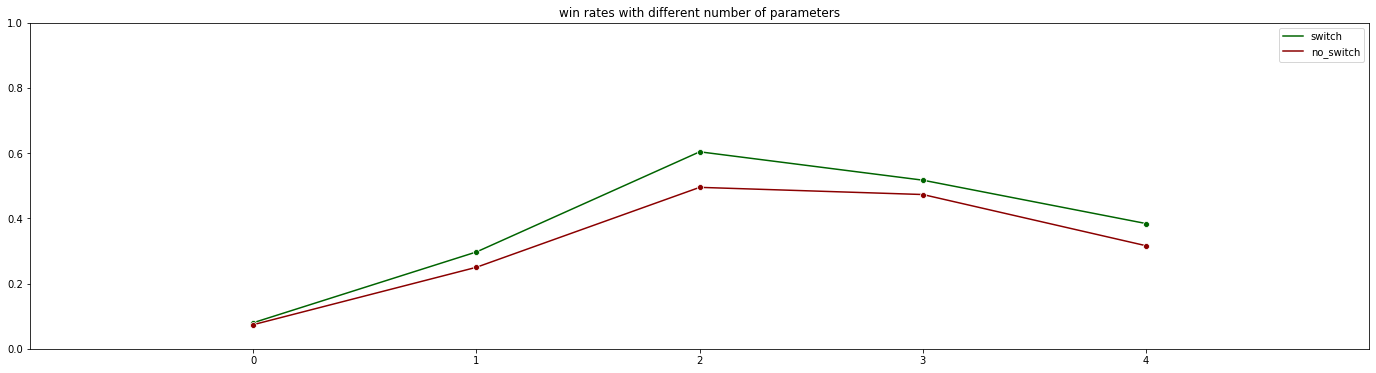

In [10]:
f.print_line_chart_monty_hall(win_rates = win_rates_s, size = (24,6))
win_rates_s

<a id='ToolVisualise'></a>
## Visualise the change in probabilities as parameters change

By entering your own values, you can simulate how much more likely to win the strategy to switch is compared to sticking to the initially chosen door(s).
Insert a range instead of a single value to visualise of the winning chances of the two strategies change when parameters change.

In [8]:
width = '750px'
style = {'description_width': 'initial'}
n = widgets.Text(value = "50", index = (0, 2), description = 'total doors', disabled = False, layout={'width': width}, style = style)
p = widgets.Text(value = "10", index = (0, 0), description = 'doors to play', disabled = False, layout={'width': width}, style = style)
w = widgets.Text(value = "1", index = (0, 0), description = 'winning doors', disabled = False, layout={'width': width}, style = style)
o = widgets.Text(value = "5", index = (0, 0), description = 'doors opened', disabled = False, layout={'width': width}, style = style)
s = widgets.Text(value = "range(1, 8)", index = (0, 0), description = 'doors to switch', disabled = False, layout={'width': width}, style = style)
simul = widgets.IntSlider(min = 1000, max = 50000, step = 1000, value = 5000, description = '# games', layout={'width': width}, style = style)

In [9]:
button = widgets.Button(description = "run!")
output = widgets.Output()

display(n, p, w, o, s, simul, button, output)

def on_button_clicked(b):
    with output:
        clear_output()
        win_rates_s = f.simulate_monty_hall(num_total_doors = eval(n.value), 
                                            num_winning_doors = eval(w.value), 
                                            num_doors_to_play = eval(p.value), 
                                            num_doors_to_open = eval(o.value), 
                                            num_doors_to_switch = eval(s.value), 
                                            trials = [simul.value]                   
                                           )
        print(win_rates_s)
        f.print_line_chart_monty_hall(win_rates = win_rates_s, rng = range(win_rates_s.count()[0]), x_switch = 0, x_no_switch = 0, y_switch = 0, y_no_switch = 0, size = (16,8))
        widgets.widgets.interaction.show_inline_matplotlib_plots()
        print(win_rates_s)

button.on_click(on_button_clicked)

Text(value='50', description='total doors', layout=Layout(width='750px'), style=DescriptionStyle(description_w…

Text(value='10', description='doors to play', layout=Layout(width='750px'), style=DescriptionStyle(description…

Text(value='1', description='winning doors', layout=Layout(width='750px'), style=DescriptionStyle(description_…

Text(value='5', description='doors opened', layout=Layout(width='750px'), style=DescriptionStyle(description_w…

Text(value='range(1, 8)', description='doors to switch', layout=Layout(width='750px'), style=DescriptionStyle(…

IntSlider(value=5000, description='# games', layout=Layout(width='750px'), max=50000, min=1000, step=1000, sty…

Button(description='run!', style=ButtonStyle())

Output()

<a id='AI'></a>
## Appendix I

<a id='AI_JP'></a>
### Joint Probabilities

#### Two Events

The Joint Probability of $X$ and $Y$ is the probability of both events occurring. It can be seen as the probability of the intersection of the two events and is the probability of $X$ occurring, given that $Y$ has occurred, multiplied by the probability that $Y$ occurs:

$P(Y, X) = P(X|Y) \times P(Y)$    

or, alternatievly, probability of $Y$ occurring, given that $X$ has occurred, multiplied by the probability that $X$ occurs:


$P(Y, X) = P(Y|X) \times P(X)$.   

Note: if the two events are independent __(i.e. one does not influence the other)__ formula simplifies to: 

$P(Y, X) = P(Y) \times P(X)$, because $P(X|Y) = P(X)$ and $P(Y|X) = P(Y)$.

In summary, if I want to know the probability of both $X$ and $Y$ occurring, I can compute probability of either of them occurring and then the probability of the second one occurring, given that the first one has occurred. These probabilities can then be multiplied to get the final result.

#### $n$ events

With the same reasoning as above we chain the probabilities together to  include more events. With $n$ events, we can generalise the formula to:

$P(X_{1}, X_{2}, X_{3}, \dots, X_{n}) = P(X_{1}| X_{2}, X_{3}, \dots, X_{n}) \times P(X_{2} | X_{3}, \dots , X_{n-1}, X_{n}) \times \dots \times P(X_{n-1}| X_{n}) \times P(X_{n})$.  

Here as well the events on which to condition can be 'swapped' e.g.:

$P(X_{1}, X_{2}, X_{3}, \dots, X_{n}) = P(X_{n}| X_{n-1}, X_{n-2}, \dots, X_{1}) \times P(X_{n-1} | X_{n-2}, \dots , X_{2}, X_{1}) \times \dots \times P(X_{2}| X_{1}) \times P(X_{1})$  



<a id='AI_BT'></a>
### Bayes' theorem

#### Two Events

From the equivalent definitions of joint probabilities $P(Y, X)$:  

$P(Y|X) \times P(X)$ and $P(Y|X) \times P(X)$   

we can derive _Bayes' Theorem_ as:

$P(Y|X) = \frac{P(X|Y) \times P(Y)}{P(X)}$, which can also be stated as $P(Y|X) = \frac{P(X|Y) \times P(Y)}{P(X|Y) \times P(Y) + P(X|\overline{Y}) \times P(\overline{Y})}$

#### $n$ events

In the more general case of $n$ events, I choose the two alternative solutions above for $P(X_{1}, X_{2}, X_{3}, \dots, X_{n})$:

$P(X_{1}, X_{2}, X_{3}, \dots, X_{n}) = P(X_{1}| X_{2}, X_{3}, \dots, X_{n}) \times P(X_{2} | X_{3}, \dots , X_{n-1}, X_{n}) \times \dots \times P(X_{n-1}| X_{n}) \times P(X_{n})$  

and 

$P(X_{1}, X_{2}, X_{3}, \dots, X_{n}) = P(X_{n}| X_{n-1}, X_{n-2}, \dots, X_{1}) \times P(X_{n-1} | X_{n-2}, \dots , X_{2}, X_{1}) \times \dots \times P(X_{2}| X_{1}) \times P(X_{1})$  

one possible formulation of the general theorem is therefore:


$P(X_{1}| X_{2}, X_{3}, \dots, X_{n}) = \frac{P(X_{1}, X_{2}, X_{3}, \dots, X_{n})}{P(X_{2}, X_{3}, \dots, X_{n})}  = \frac{P(X_{n}| X_{n-1}, X_{n-2}, \dots, X_{1}) \times P(X_{n-1} | X_{n-2}, \dots , X_{2}, X_{1}) \times \dots \times P(X_{2}| X_{1}) \times P(X_{1})}{P(X_{2} | X_{3}, \dots , X_{n-1}, X_{n}) \times \dots \times P(X_{n-1}| X_{n}) \times P(X_{n})}$


<a id='SMH'></a>
### Solution of the Monty Hall game

I will denote here:    
 - the initial choice of the contenstant for door 1, 2 or 3 as $P_1$, $P_2$ and $P_3$, respectively. (I use P as in Play)   
 - the choice of the host to open door 1, 2 or 3 as $O_1$, $O_2$ and $O_3$, respectively. (I use O as in Open)   
 - the car being behind door 1, 2 or 3 as $C_1$, $C_2$ and $C_3$, respectively. (I use C as in Car)

and use the _Joint Probabilities_ and _Bayes' Theorem_ definitions above.

As the start of the game, no information on the position of the car is available to the contestant. 

The prior probability of the car being behind any one (i = 1, 2, 3) door is $P(C_1) = P(C_2) = P(C_3) = \frac{1}{3}$. After the contestant has made the initial choice:

 - If the contestant unknowingly chooses a door with a sheep in the first step (in this example door number 2), the host must open door number 3 in order not to reveal that behind door number one is a car. This means that the probability of the host opening door 3, conditional on knowing that the car is behind door 1 and on the contestant choosing door 2 in the first place is equal to 1.    
 - If, instead, the contestant choses the winning door in the first step (in this exaple door number 1), the host can choose to open either door number 2 or door number 3. This means that the probability of the host opening door 2 or 3, conditional on knowing that the car is behind door 1 and on the contestant choosing door 1 in the first place is equal to 0.5.   

<table border="o">
    <col width="200"><col width="200">
    <tr><td><b style="font-size:12px"><center>${P(O_3|C_1, P_2) = 1}$<center></b></td><td><b style="font-size:12px"><center>${P(O_3|C_1, P_1) = 0.5}$   <center></b></td></tr>
<tr>
<td>       
            
1.&nbsp;🚗🚪&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp;&nbsp;💭     
2.&nbsp;🐐🚪 ⬅ &nbsp;   🤔     
3.&nbsp;🐐🚪       
            
</td>
<td>
            
            
1.&nbsp;🚗🚪⬅ &nbsp; &nbsp; &nbsp; 💭   
2.&nbsp;🐐🚪&nbsp; &nbsp; &nbsp; &nbsp;  🤔     
3.&nbsp;🐐🚪        
            
</td>
</tr>
</table>
             

###### Losing Initial Choice

The contestant chooses door 2, while the car is behing door 1.

$P(C_1|P_2, O_3) = \frac{P(C_1, P_2, O_3)}{P(P_2, O_3)} = \frac{P(O_3|C_1, P_2) \times P(C_1, P_2)}{P(P_2, O_3)} = \frac{{\color{red}{P(O_3|C_1, P_2)}} \times P(C_1) \times P(P_2)}{P(O_3| P_2) \times P(P_2)} = \frac{\color{red}{1} \times (1/3) \times (1/3)}{(1/2) \times (1/3)} = \frac{(1/3)}{(1/2)} = \frac{2}{3}$

$P(C_2|P_2, O_3) = \frac{P(C_2, P_2, O_3)}{P(P_2, O_3)} = \frac{P(O_3|C_2, P_2) \times P(C_2, P_2)}{P(P_2, O_3)} = \frac{{\color{red}{P(O_3|C_2, P_2)}} \times P(C_1) \times P(P_2)}{P(O_3| P_2) \times P(P_2)} = \frac{\color{red}{1/2} \times (1/3) \times (1/3)}{(1/2) \times (1/3)} = \frac{1}{3}$

$P(C_3|P_2, O_3) = \frac{P(C_3, P_2, O_3)}{P(P_2, O_3)} = \frac{P(O_3|C_3, P_2) \times P(C_3, P_2)}{P(P_2, O_3)} = \frac{{\color{red}{P(O_3|C_3, P_2)}} \times P(C_1) \times P(P_2)}{P(O_3| P_2) \times P(P_2)} = \frac{\color{red}{0} \times (1/3) \times (1/3)}{(1/2) \times (1/3)} = 0$ - this is of course expected as the host opens the door revealing it as loosing.

###### Winning Initial Choice

The contestant chooses door 1, behind which the car is.

$P(C_1|P_1, O_3) = \frac{P(C_1, P_1, O_3)}{P(P_1, O_3)} = \frac{P(O_3|C_1, P_1) \times P(C_1, P_1)}{P(P_1, O_3)} = \frac{{\color{red}{P(O_3|C_1, P_1)}} \times P(C_1) \times P(P_1)}{P(O_3| P_1) \times P(P_1)} = \frac{\color{red}{1/2} \times (1/3) \times (1/3)}{(1/2) \times (1/3)} = \frac{1}{3}$

$P(C_2|P_1, O_3) = \frac{P(C_2, P_1, O_3)}{P(P_1, O_3)} = \frac{P(O_3|C_2, P_1) \times P(C_2, P_1)}{P(P_1, O_3)} = \frac{{\color{red}{P(O_3|C_2, P_1)}} \times P(C_1) \times P(P_1)}{P(O_3| P_1) \times P(P_1)} = \frac{\color{red}{1} \times (1/3) \times (1/3)}{(1/2) \times (1/3)} = \frac{(1/3)}{(1/2)} = \frac{2}{3}$

$P(C_3|P_1, O_3) = \frac{P(C_3, P_1, O_3)}{P(P_1, O_3)} = \frac{P(O_3|C_3, P_1) \times P(C_3, P_1)}{P(P_1, O_3)} = \frac{{\color{red}{P(O_3|C_3, P_1)}} \times P(C_1) \times P(P_1)}{P(O_3| P_1) \times P(P_1)} = \frac{\color{red}{0} \times (1/3) \times (1/3)}{(1/2) \times (1/3)} = 0$ - this is of course expected as the host opens the door revealing it as loosing.


In $\color{red}{red}$ you can see how the different results stem from the choice of the host of which door to open being dependent on the knowledge of where the car is and what door the contestant has chosen.


Generalising, if the contestant chooses door $y$, the and the host opens door $z$, the probability of the car being behind door $i (i = 1, 2, 3)$, after door $z$ has been revealed as losing is:

$
\begin{equation}
  P(C_i|P_y, O_z)  =
    \begin{cases}
      \frac{1}{3} & \text{if $i=y$} \\
      \frac{2}{3} & \text{if $i \neq y$}\\
    \end{cases}       
\end{equation}
$

Where $i=y$ means that the car is behind the same door the contestant has chosen in the first place (not switching wins), while $i \neq y $means that the car is behind the door not initially chosen by the contestant (switching wins).
        
***

An alternative, and maybe more intuitive, way to see this is to consider that, with the initial choice, the contestant has:    

a. $\frac{1}{3}$ probability of choosing the winning door.   

In such case, the switching makes you fail as the probability of choosing a winning door by switching is 0, if the contestant had already chosen a winning door at the beginning.

b. $\frac{2}{3}$ probability of choosing a losing door.
        
In such case, the probability of winning by switching is equal to one, as the only winning door would be the only one remining to be chosen.               


Hence, the probability of winning by switching is equal to:


$\frac{1}{3} \times 0 + \frac{2}{3} \times 1 = \frac{2}{3}$

        
        
<a id='SGG'></a>
### Solution of the General Case


The generalisation here expands the base case to allow for $n$ total doors, $w$ winning doors and $o$ doors opened by the host.

Below we compute the conditional probility of the car being behind any door $i$, $P(C_i)$, given the information revealed during the game, i.e. the door $y$ played by the contestant, $P_y$, the $o$ doors opened by the host $O_{(\omega_1, ..., \omega_z, ..., \omega_o)}$. I will call $\Omega$ the set $(\omega_1, ..., \omega_z, ..., \omega_o)$ and write the probability as:

$P(C_i|P_y, O_\Omega)$    

I define later the set of $w$ winning doors as $\Delta = (\delta_1, ..., \delta_i, ..., \delta_w)$


**What is the probability of the car being behind door $i$, if the contestant has played door $y$ and the host has opened a certain set of $o$ doors?**   

$P(C_i|P_y, O_\Omega) = \frac{P(C_i, P_y, O_\Omega)}{P(P_i, O_\Omega)} = \frac{P(O_\Omega|C_i, P_y) \times P(C_i, P_y)}{P(P_i, O_\Omega)} = \frac{{P(O_\Omega|C_i, P_y)} \times P(C_i) \times P(P_y)}{P(O_\Omega| P_y) \times P(P_y)} = \frac{{\color{red}{P(O_\Omega|C_i, P_y)}} \times P(C_i)}{P(O_\Omega| P_y)}$

 - Using $n$ as number of total doors, the unconditional probability of the car being behind any one door equals $P(C_i) = \frac{w}{n}$: The number of cars divided by the number of doors.     
 

 - $P(O_\Omega| P_y)$ is the probability that the host opens a set of $o$ doors, if the contestant has played door $y$. The host will open $o$ doors out of the $n-w$ not chosen. The possible choices are ${n-w \choose o}$ and the probability of each combination is therefore $\frac{1}{n-w \choose o}$. 

 - $P(O_\Omega|C_i, P_y)$ is the probability that the host opens a set of $o$ doors, if the contestant has played door $y$ and the car is behind doors $i$. If the contestant has initially chosen a winning door, the possible combinations are the same amount as before: $o$ doors out of the $n-w$. If the contestant has initially chosen a loosing door, the host will be able to choose $o$ doors out of the $n-w-1$. Hence:

    * if $y \in \Delta $, $P(O_\Omega|C_i, P_y)=\frac{1}{n-w \choose o}$

    * if $y \notin \Delta$, $P(O_\Omega|C_i, P_y)=\frac{1}{n-w-1 \choose o}$

Going back to the main equation remeber that $i \in \Delta$:

$P(C_i|P_y, O_\Omega) = \frac{{\color{red}{P(O_\Omega|C_i, P_y)}} \times P(C_i)}{P(O_\Omega| P_y)}$ 

 - if $y \in \Delta $     
     $P(C_i|P_y, O_\Omega) = \frac{\frac{1}{\color{red}{{n-w} \choose o}} \times \frac{w}{n}}{\frac{1}{n-w \choose o}} = \frac{w}{n}$

 - if $y \notin \Delta$     
     $P(C_i|P_y, O_\Omega) = \frac{\frac{1}{\color{red}{{n-w-1} \choose o}} \times \frac{w}{n}}{\frac{1}{n-w \choose o}} = \frac{w}{n} \times \frac{n-1}{n-o-1}$


Since $o$ is an integer $n-o-1 < n-1$ and $\frac{1}{n} \times \frac{n-1}{n-o-1} > \frac{1}{n}$. Choosing a door $i$ different from the initial choice $y$ works in favor of the contestant. 

This advantage decreases as $n$ gets larger and increases as $o$ gets larger.

***

Another alternative way to see this is that, with the initial choice, the contestant has:    

a. $\frac{w}{n}$ probability of choosing the winning door.   

In such case, the switching makes you win only if you switch to another winning door. The probability of choosing a different winning door is equal to $\frac{w-1}{n-o-1}$, i.e. the number of winning doors (except the one initially chosen) out of the possible choices (total doors - the doors revealed as losing - the initial choice)    

b. $\frac{n-w}{n}$ probability of choosing a losing door.             

In such case, the probability of choosing the winning door is equal to $\frac{w}{n-o-1}$, i.e. the number of winning doors out of the possible choices (total doors - the doors revealed as losing - the initial choice)

Hence, the probability of winning by switching is equal to:


$\frac{w}{n} \times \frac{w-1}{n-o-1} + \frac{n-w}{n} \times \frac{w}{n-o-1} = \frac{w}{n} \times \frac{n-1}{n-o-1}$


***